In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [3]:
# Reading dataset
dataframe = pd.read_csv('uberDataset.csv')

In [5]:
dataframe.head(100)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-10-30,16:29:36,"""CNR3274519""",Cancelled by Driver,"""CID3829804""",eBike,Chhatarpur,Gurgaon Sector 29,6.0,NaN,...,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2024-08-11,18:21:32,"""CNR3263958""",Completed,"""CID3231090""",Go Sedan,IMT Manesar,Ashram,2.6,36.2,...,NaN,NaN,NaN,NaN,NaN,705.0,40.18,3.9,4.8,UPI
97,2024-05-21,17:39:58,"""CNR5822542""",No Driver Found,"""CID1628370""",Uber XL,Madipur,DLF City Court,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2024-10-08,08:52:57,"""CNR9652983""",Completed,"""CID4773175""",Go Sedan,Azadpur,Khan Market,2.1,35.5,...,NaN,NaN,NaN,NaN,NaN,480.0,20.22,4.3,4.8,Debit Card


In [5]:
dataframe.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [6]:
dataframe.shape

(150000, 21)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [8]:
dataframe.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [9]:
dataframe.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [10]:
dataframe.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

INSIGHTS AND OBSERVATION

This Dataset has a missing values

In [11]:
dataframe.head(15)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [ ]:
dataframe['Vehicle Type'].unique()

array(['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini',
       'Uber XL'], dtype=object)

In [13]:
dataframe.nunique()

Date                                    365
Time                                  62910
Booking ID                           148767
Booking Status                            5
Customer ID                          148788
Vehicle Type                              7
Pickup Location                         176
Drop Location                           176
Avg VTAT                                181
Avg CTAT                                351
Cancelled Rides by Customer               1
Reason for cancelling by Customer         5
Cancelled Rides by Driver                 1
Driver Cancellation Reason                4
Incomplete Rides                          1
Incomplete Rides Reason                   3
Booking Value                          2566
Ride Distance                          4901
Driver Ratings                           21
Customer Rating                          21
Payment Method                            5
dtype: int64

In [14]:
dataframe['Vehicle Type'].value_counts()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

In [15]:
dataframe.replace({'Vehicle Type': {'Auto': 1, 'Go Mini': 2, 'Go Sedan': 3, 'Bike': 4, 'Premier Sedan': 5, 'eBike': 6, 'Uber XL': 7}}, inplace=True)

In [6]:
dataframe['Vehicle Type'].unique()
dataframe.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


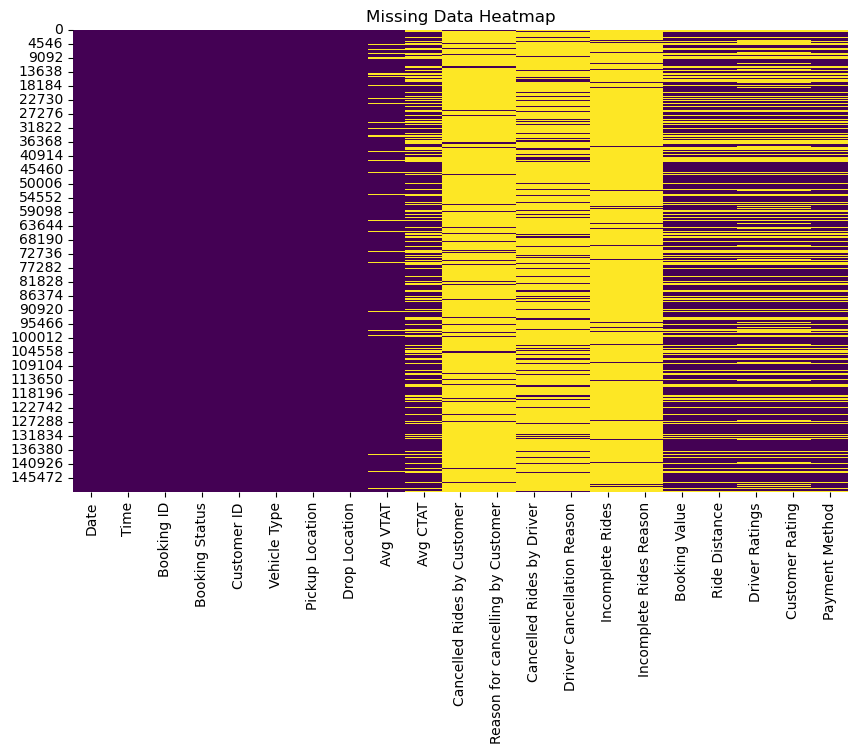

In [17]:
#Plotting graphs to visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

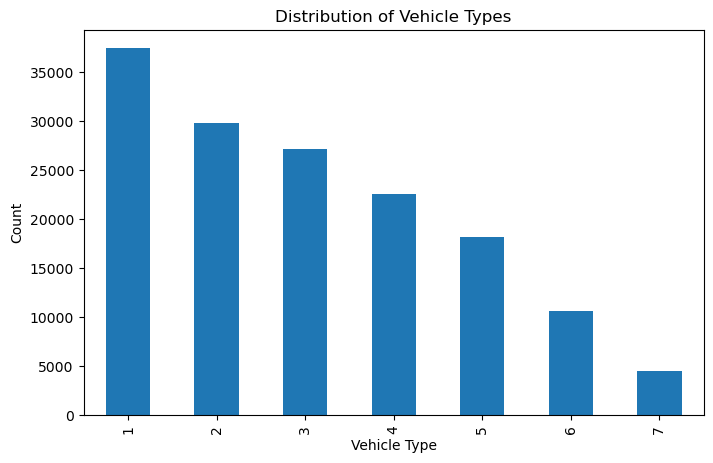

In [18]:
plt.figure(figsize=(8,5))
dataframe['Vehicle Type'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Types')
plt.show()


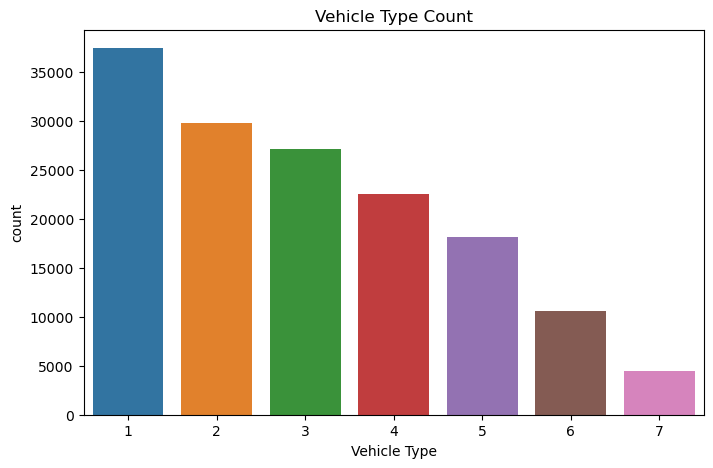

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Vehicle Type', data=dataframe)
plt.title('Vehicle Type Count')
plt.show()


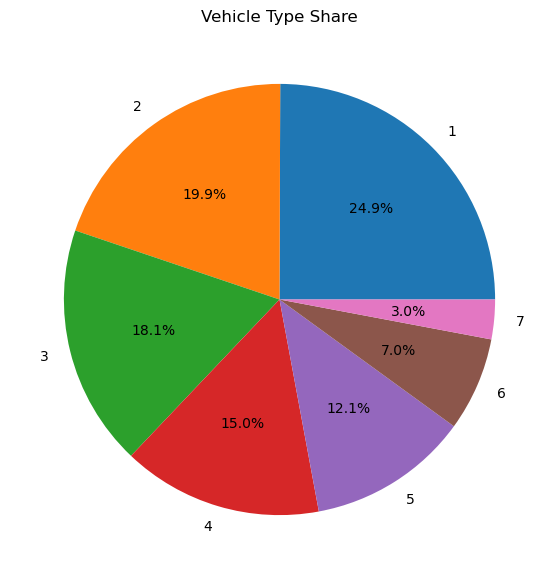

In [20]:
plt.figure(figsize=(7,7))
dataframe['Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Vehicle Type Share')
plt.ylabel('')
plt.show()


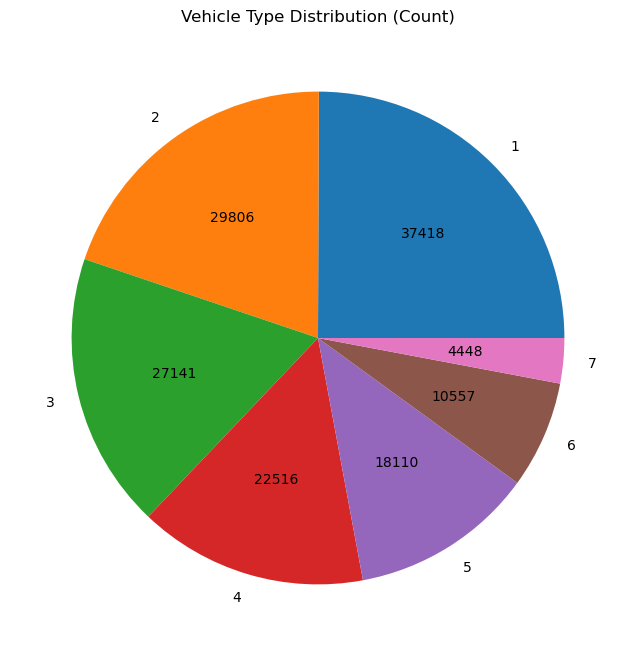

In [ ]:
counts = dataframe['Vehicle Type'].value_counts()

plt.figure(figsize=(8,8))
counts.plot.pie(
    autopct=lambda p: f'{int(p*counts.sum()/100)}',
    title='Vehicle Type Distribution (Count)'
)
plt.ylabel('')
plt.show()


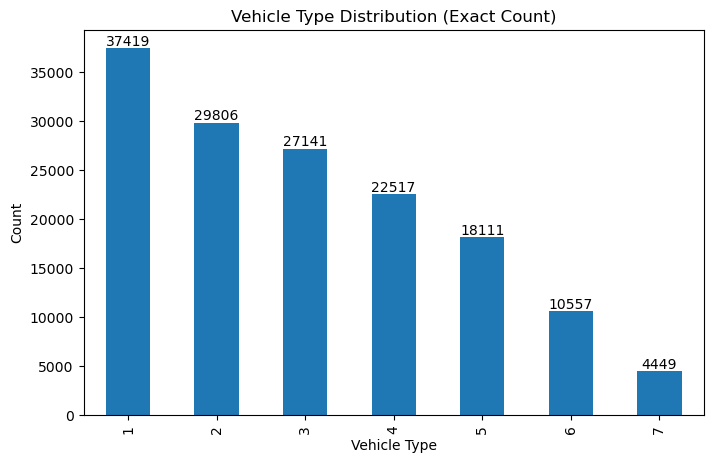

In [22]:
plt.figure(figsize=(8,5))
ax = dataframe['Vehicle Type'].value_counts().sort_index().plot(kind='bar')

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom'
    )

plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Vehicle Type Distribution (Exact Count)')
plt.show()


In [23]:
dataframe['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [24]:
dataframe.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",6,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",3,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",1,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",5,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",4,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",1,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",2,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",1,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",3,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",1,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


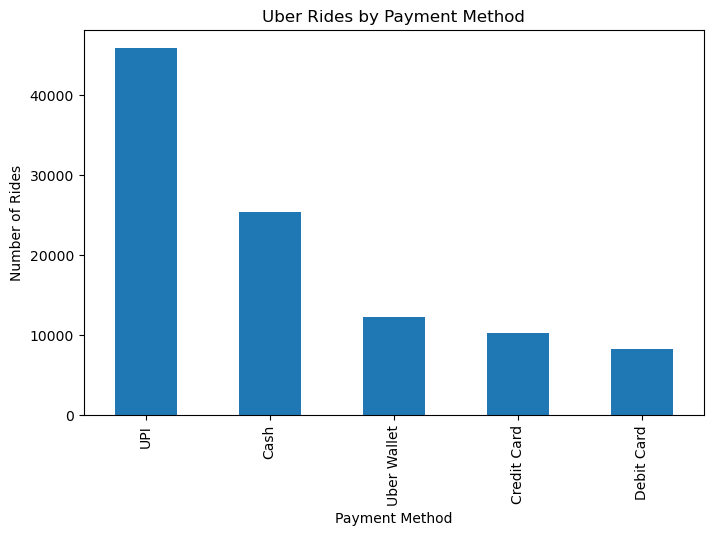

In [25]:
payment_counts = dataframe['Payment Method'].value_counts()

plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar')
plt.title('Uber Rides by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Rides')
plt.show()


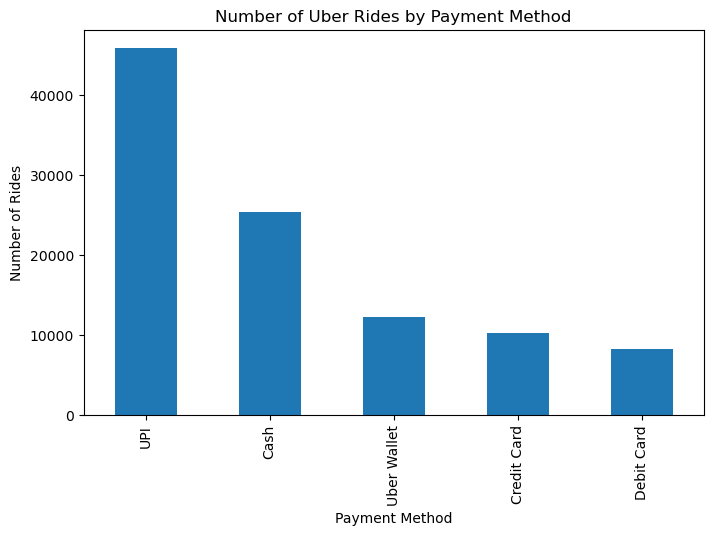

In [26]:
payment_counts = dataframe['Payment Method'].value_counts()

plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar')
plt.title('Number of Uber Rides by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Rides')
plt.show()


In [27]:
payment_counts = dataframe['Payment Method'].value_counts()
print(payment_counts)


Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64


In [28]:
payment_df = payment_counts.reset_index()
payment_df.columns = ['Payment_Method', 'Ride_Count']
payment_df


,Payment_Method,Ride_Count
0,UPI,45909
1,Cash,25367
2,Uber Wallet,12276
3,Credit Card,10209
4,Debit Card,8239


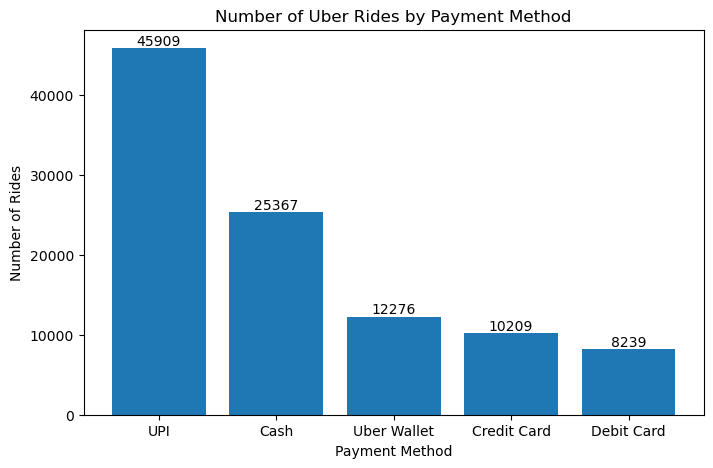

In [29]:
plt.figure(figsize=(8,5))
plt.bar(payment_df['Payment_Method'], payment_df['Ride_Count'])
plt.title('Number of Uber Rides by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Rides')

# Show exact count on bars
for i, value in enumerate(payment_df['Ride_Count']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


SVM

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
# Select only numeric columns
X = dataframe.select_dtypes(include=['int64', 'float64'])

# Remove target column if included
X = X.drop('Vehicle Type', axis=1)

y = dataframe['Vehicle Type']


In [ ]:
# -------------------------------
# Step 2: Train-Test Split
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
    #random_state=42 ensures reproducibility of results
)

In [33]:
# -------------------------------
# Step 3: Feature Scaling (Very Important for SVM)
# -------------------------------

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# -------------------------------
# Optional: Reduce Dataset Size (for speed)
# -------------------------------
dataframe_small = dataframe.sample(10000, random_state=42)  # Adjust if needed

# -------------------------------
# Select numeric features only
# -------------------------------
X = dataframe_small.select_dtypes(include=['int64','float64'])
X = X.drop('Vehicle Type', axis=1)
y = dataframe_small['Vehicle Type']

# -------------------------------
# Handle Missing Values
# -------------------------------
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -------------------------------
# Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# Fast Linear SVM
# -------------------------------
svm_model = LinearSVC(max_iter=3000)
svm_model.fit(X_train, y_train)

# -------------------------------
# Prediction
# -------------------------------
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.2308


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


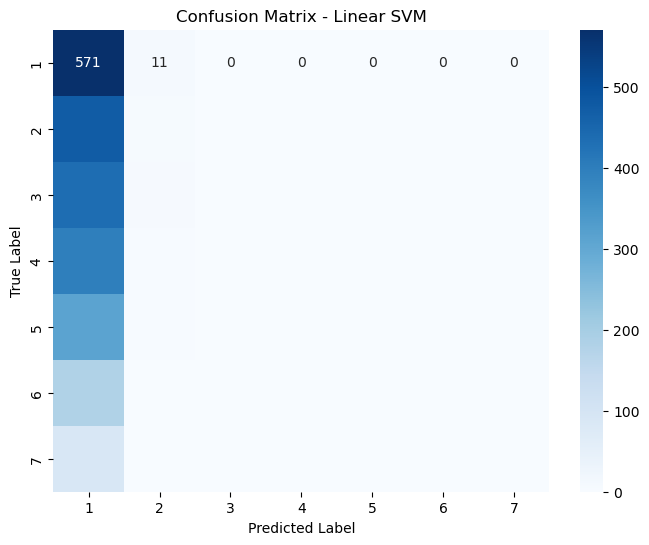


Classification Report:

              precision    recall  f1-score   support

           1       0.23      0.98      0.37       582
           2       0.18      0.01      0.02       481
           3       0.00      0.00      0.00       443
           4       0.00      0.00      0.00       402
           5       0.00      0.00      0.00       318
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00        93

    accuracy                           0.23      2500
   macro avg       0.06      0.14      0.06      2500
weighted avg       0.09      0.23      0.09      2500



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [37]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# -------------------------------
# Accuracy Table
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)

accuracy_table = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy]
})

print("\nAccuracy Table:")
print(accuracy_table)


# -------------------------------
# Confusion Matrix Table
# -------------------------------
cm = confusion_matrix(y_test, y_pred)

cm_table = pd.DataFrame(
    cm,
    index=[f"Actual {label}" for label in svm_model.classes_],
    columns=[f"Predicted {label}" for label in svm_model.classes_]
)

print("\nConfusion Matrix Table:")
print(cm_table)


# -------------------------------
# Classification Report Table
# -------------------------------
report = classification_report(y_test, y_pred, output_dict=True)

report_table = pd.DataFrame(report).transpose()

print("\nClassification Report Table:")
print(report_table)



Accuracy Table:
     Metric   Value
0  Accuracy  0.2308

Confusion Matrix Table:
          Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1          571           11            0            0            0   
Actual 2          475            6            0            0            0   
Actual 3          436            7            0            0            0   
Actual 4          399            3            0            0            0   
Actual 5          314            4            0            0            0   
Actual 6          181            0            0            0            0   
Actual 7           91            2            0            0            0   

          Predicted 6  Predicted 7  
Actual 1            0            0  
Actual 2            0            0  
Actual 3            0            0  
Actual 4            0            0  
Actual 5            0            0  
Actual 6            0            0  
Actual 7            0            0  

Clas

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
